In [10]:
import sys
sys.path.append('..')
import ImpedanceSynthesiser as imps
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

reload(imps)

<module 'ImpedanceSynthesiser' from '../ImpedanceSynthesiser.pyc'>

In [42]:
world = imps.AcousticWorld()

l0 = .75

ducts = []

duct = imps.Duct(world=world,losses=True)
duct.set_termination(imps.PerfectOpenEnd())
duct.append_element(imps.StraightDuct(length=l0,radius=.0075))
ducts.append(duct)

duct = imps.Duct(world=world,losses=True)
duct.set_termination(imps.PerfectOpenEnd())
lb = .35
duct.append_element(imps.StraightDuct(length=lb,radius=.0075))
duct.append_element(imps.StraightDuct(length=l0-lb,radius=.015))
ducts.append(duct)

duct = imps.Duct(world=world,losses=True)
duct.set_termination(imps.PerfectOpenEnd())
lb = .5
duct.append_element(imps.StraightDuct(length=l0,radius=.0073))
duct.append_element(imps.StraightDuct(length=lb,radius=.0025))
ducts.append(duct)

<IPython.core.display.Javascript object>


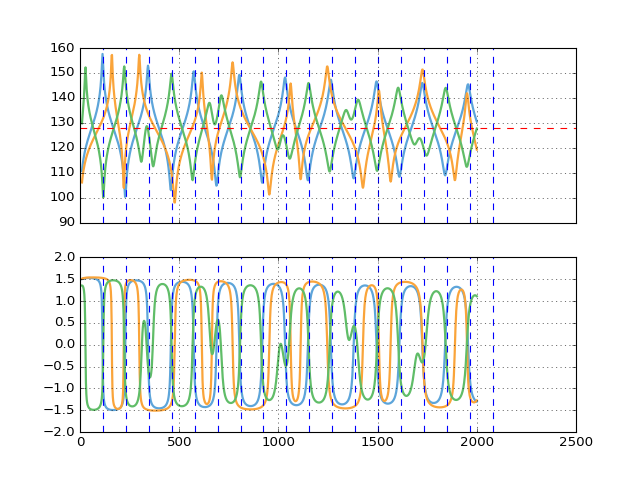

In [43]:
fvec = np.linspace(10,2000,1000)

fig,ax=pl.subplots(2,sharex=True)

for duct in ducts:
    z=[]
    for f in fvec:
        z.append(duct.get_input_impedance_at_freq(f))
    
    ax[0].plot(fvec,20*np.log10(np.abs(z)))
    ax[1].plot(fvec,np.angle(z))

ax[0].axhline(20*np.log10(np.abs(duct.elements[0].get_characteristic_impedance())),lw=1,ls='--',color='r')

f=0
c=duct.speed_of_sound
while f < max(fvec):
    f+=c/(4*l0)
    ax[0].axvline(f,ls='--',lw=1)
    ax[1].axvline(f,ls='--',lw=1)

<IPython.core.display.Javascript object>


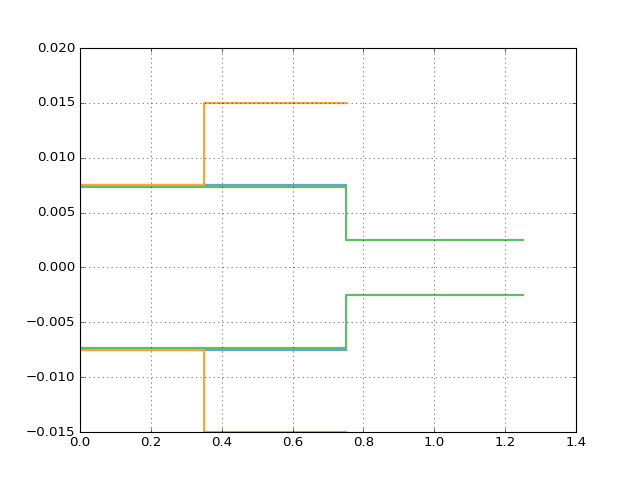

In [44]:

pl.figure()
for duct in ducts:
    x,y=duct.get_coords()
    ln=pl.plot(x,y)
    pl.plot(x,-np.array(y), color = ln[0].get_color())

In [5]:
duct.elements[0].get_characteristic_impedance()

2322919.5149996667

In [6]:
1.2*340/(.0075**2*np.pi)

2308807.7077864287

In [7]:
c/4/l0

57.791533558750565

In [8]:
ax[0].get_xlim()[-1]


2500.0

In [9]:
duct.elements[0].get_propagation_coefficient(1000.)

18.12025891529634